In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [4]:
# 读取四张表的数据
#读取了订单和产品的关联，csv比较大
prior = pd.read_csv("./data/instacart/order_products__prior.csv")

In [6]:
#产品id和产品名称的对应
products = pd.read_csv("./data/instacart/products.csv")

In [7]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("./data/instacart/orders.csv")

In [8]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("./data/instacart/aisles.csv")

In [9]:
# 合并四张表到一张表  （用户-物品类别）
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [10]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,205970,prior,16,5,17,12.0,yogurt


In [11]:
mt.shape

(32434489, 14)

In [12]:
# 交叉表（特殊的分组工具）
cross = pd.crosstab(mt['user_id'], mt['aisle'])

In [13]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [17]:
cross.shape

(206209, 134)

In [18]:
pca = PCA(n_components=0.9)
pca

PCA(n_components=0.9)

In [19]:
data = pca.fit_transform(cross)
data
data.shape

(206209, 27)

In [21]:
# 把样本数量减少
x = data[:500]
x.shape

(500, 27)

In [22]:
x

array([[-24.21565874,  -2.4294272 ,  -2.46636975, ...,   0.68680034,
          1.69439402,  -2.34323022],
       [  6.46320806, -36.75111647,   8.38255336, ...,   4.12121252,
          2.4468974 ,  -4.28348478],
       [ -7.99030162,  -2.40438257, -11.03006405, ...,   1.77534453,
         -0.44419403,   0.78666557],
       ...,
       [-11.92661183,   6.28156437,   6.49043833, ...,  -0.93499096,
         -0.1409791 ,   0.04370174],
       [-18.05675245,   0.42589035,  -3.92660866, ...,  -1.02048351,
         -0.95283767,   0.90135767],
       [-24.62244434,   0.5635177 ,  -0.90551124, ...,   0.86904501,
         -2.15569229,  -0.40915483]])

In [23]:
x.max()

np.float64(407.1856341824979)

In [24]:
x.min()

np.float64(-144.56766126863667)

In [45]:
# 假设用户一共分为四个类别
km = KMeans(n_clusters=2)

In [46]:
km.fit(x)  #开始训练

KMeans(n_clusters=2)

In [63]:
#开始预测
predict = km.predict(x)

In [61]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
len(predict)

500

In [50]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

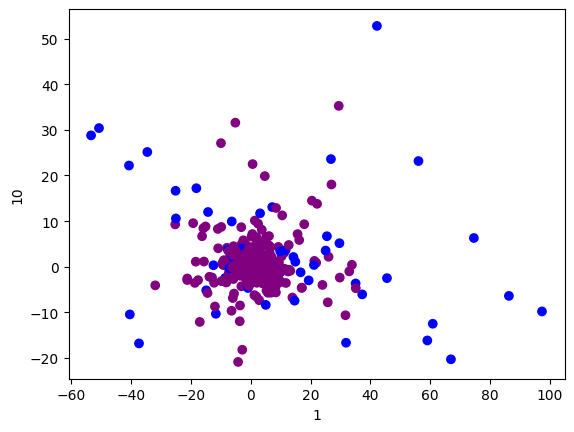

In [54]:
# 建立四个颜色的列表
colored = ['blue', 'purple']
colr = [colored[i] for i in predict]
#任意两个特征来看聚类的图
plt.scatter(x[:, 2], x[:, 10], color=colr)
plt.xlabel("1")
plt.ylabel("10")
plt.show()

In [55]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

np.float64(0.6779999767608768)

In [56]:
#改为2时的结果
km = KMeans(n_clusters=3)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)

np.float64(0.6296424326245788)

In [58]:
#改为3时的结果
km = KMeans(n_clusters=4)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)

np.float64(0.6277107036257037)